In [2]:
pip install ucla_geotech_tools.response_spectrum

  Using cached https://files.pythonhosted.org/packages/09/2e/c3de8fd9bdf257337c1bfdda4dedee116d8a9f2d0760cd757794fc420bec/ucla_geotech_tools_response_spectrum-1.0.0-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>


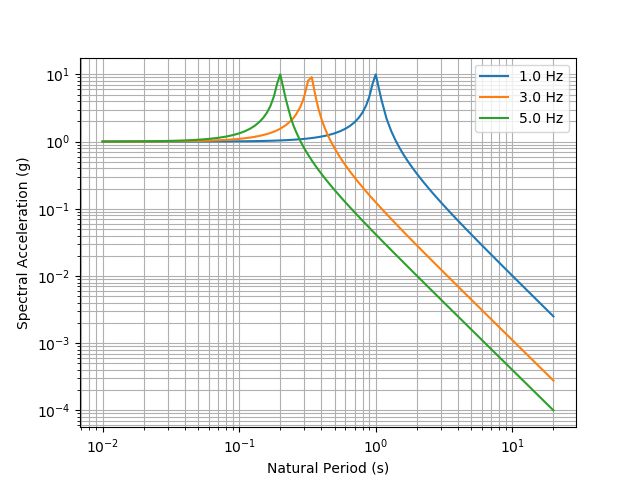

In [6]:
%matplotlib notebook
import numpy as np
import ucla_geotech_tools.response_spectrum as ars
import matplotlib.pyplot as plt

N = 4000               # Number of time steps
M = 3                  # Number of motions
dt = 0.005             # Time step in seconds
D = 0.05               # Damping
freq = [1.0, 3.0, 5.0] # Frequencies for three different harmonic motions

motions = np.empty([M,N],dtype="float64")
for i in range(M):
    for j in range(N):
        motions[i][j] = np.sin(2*np.pi*freq[i]*j*dt)

T = ars.get_ngawest2_T()
Sa = ars.get_response_spectrum(motions=motions, dt=dt, D=D, zeropad=0, verbose=0) # returns Python array containing pseudo-spectral acceleration values 

for i in range(M):
    plt.loglog(T,Sa[i],label=str(freq[i])+" Hz")
plt.xlabel('Natural Period (s)')
plt.ylabel('Spectral Acceleration (g)')
plt.legend()
plt.grid(True,which='both')
plt.savefig('spectral_acceleration.png')
